In [1]:
from mylibs import libs as ml
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing, metrics, neighbors, svm

In [2]:
df = pd.read_csv('pima-indians-diabetes.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# 1 e 5 possuem uma correlação maior com a label (8)
df.corr()

,0,1,2,3,4,5,6,7,8
0,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
1,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
2,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
3,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
4,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
5,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
6,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
7,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
8,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [4]:
X = df.iloc[:, [1, 5]].values
y = df.iloc[:,8].values

In [5]:
scale_std = preprocessing.StandardScaler().fit(X)
X = scale_std.transform(X)

### Perceptron

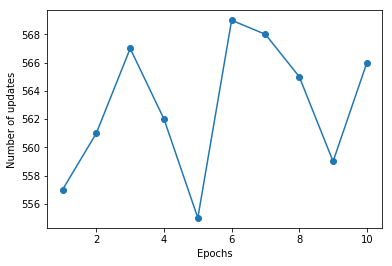

In [6]:
ppn = ml.Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

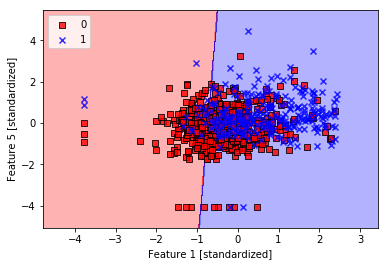

In [7]:
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')


plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Feature 1 [standardized]')
plt.ylabel('Feature 5 [standardized]')
plt.legend(loc='upper left')

plt.show()

### Adaline GD

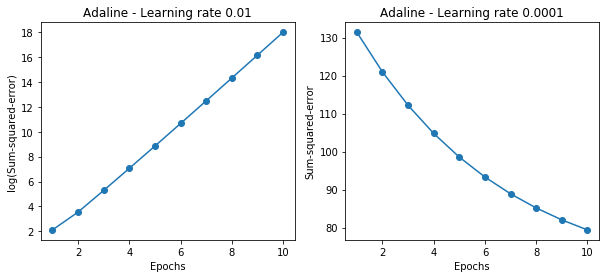

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = ml.AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = ml.AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.show()

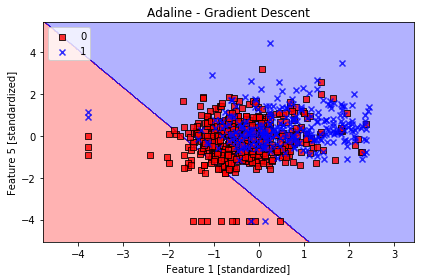

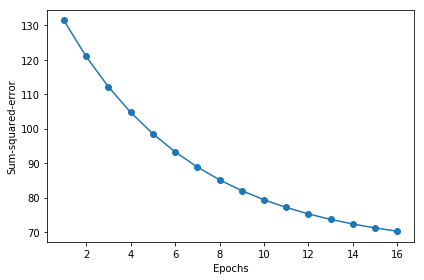

In [9]:
ada = ml.AdalineGD(n_iter=16, eta=0.0001)
ada.fit(X, y)

plot_decision_regions(X, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('Feature 1 [standardized]')
plt.ylabel('Feature 5 [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
plt.show()

### Adaline SGD

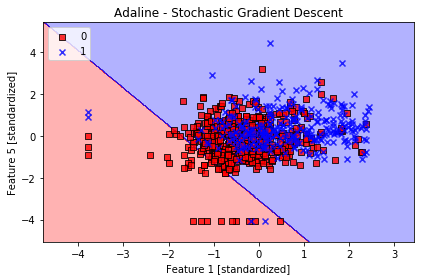

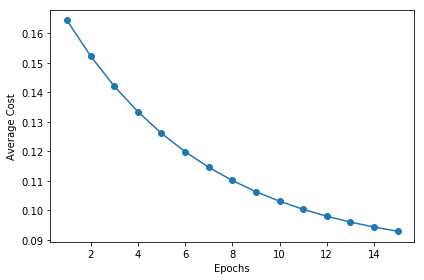

In [10]:
ada = ml.AdalineSGD(n_iter=15, eta=0.0001, random_state=1)
ada.fit(X, y)

plot_decision_regions(X, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('Feature 1 [standardized]')
plt.ylabel('Feature 5 [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()

plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()
plt.show()

### Use K-Fold Cross Validation Estratificada com k = 3 para obter a acurácia dos 3 algoritmos acima sobre o dataset pima-indians-diabetes.csv. Faça Standardization dos dados (fit para o conjunto de treino e transform para treino e teste).
* Compare também com as implementações de Logistic Regression, kNN, Naive Bayes e SVM do Scikit-Learn.
* Ajuste os algoritmos através de seus hiper-parâmetros para obter os melhores resultados possíveis em cada algoritmo.

In [18]:
kfold = StratifiedKFold(n_splits=3)
kfold.get_n_splits()

acc_logisticRegression = []
acc_knn = []
acc_nbayes = []
acc_svm = []
acc_ppn = []
acc_adagd = []
acc_adasgd = []

for idx_train, idx_test in kfold.split(X, y):
    X_train_std, X_test_std, y_train, y_test = X[idx_train], X[idx_test], y[idx_train], y[idx_test]
    
    # Perceptron
    ppn = ml.Perceptron(eta=0.1, n_iter=10)
    ppn.fit(X_train_std, y_train)
    y_pred_ppn = ppn.predict(X_test_std)
    acc_ppn.append(metrics.accuracy_score(y_test, y_pred_ppn))

    # Adaline GD
    adagd = ml.AdalineGD(n_iter=16, eta=0.0001)
    adagd.fit(X_train_std, y_train)
    y_pred_adagd = adagd.predict(X_test_std)
    acc_adagd.append(metrics.accuracy_score(y_test, y_pred_adagd))

    # Adaline SGD
    adasgd = ml.AdalineSGD(n_iter=15, eta=0.0001, random_state=1)
    adasgd.fit(X_train_std, y_train)
    y_pred_adasgd = adasgd.predict(X_test_std)
    acc_adasgd.append(metrics.accuracy_score(y_test, y_pred_adasgd))
    
    #LogisticRegression
    model_logisticRegression = LogisticRegression()
    model_logisticRegression.fit(X_train_std, y_train)
    y_pred_lr = model_logisticRegression.predict(X_test_std)
    acc_logisticRegression.append(metrics.accuracy_score(y_test, y_pred_lr))
    
    #KNN
    model_knn = neighbors.KNeighborsClassifier(n_neighbors=15)
    model_knn.fit(X_train_std, y_train)
    y_pred_knn = model_knn.predict(X_test_std)
    acc_knn.append(metrics.accuracy_score(y_test, y_pred_knn))
    
    #NaiveBayes
    model_nbayes = GaussianNB()
    model_nbayes.fit(X_train_std, y_train)
    y_pred_nbayes = model_nbayes.predict(X_test_std)
    acc_nbayes.append(metrics.accuracy_score(y_test, y_pred_nbayes))
    
    #SVM
    model_svm = svm.SVC()
    model_svm.fit(X_train_std, y_train)
    y_pred_svm = model_svm.predict(X_test_std)
    acc_svm.append(metrics.accuracy_score(y_test, y_pred_svm))

In [19]:
print('Accuracy Média: ')
print('Perceptron: ' + str(np.mean(acc_ppn)))
print('Adaline GD: ' + str(np.mean(acc_adagd)))
print('Adaline SGD: ' + str(np.mean(acc_adasgd)))
print('LogisticRegression: ' + str(np.mean(acc_logisticRegression)))
print('KNN: ' + str(np.mean(acc_knn)))
print('NaiveBayes: ' + str(np.mean(acc_nbayes)))
print('SVM: ' + str(np.mean(acc_svm)))

Accuracy Média: 
Perceptron: 0.3032814844485135
Adaline GD: 0.3437433241779202
Adaline SGD: 0.3437433241779202
LogisticRegression: 0.7643307051257597
KNN: 0.746126711871519
NaiveBayes: 0.7578354878754355
SVM: 0.7552261752625823


### Explique as diferenças entre o Adaline com Gradiente Descendente em Batch e o Adaline com Gradiente Descendente Estocástico.

Um dos principais ingredientes dos algoritmos de aprendizado de máquina supervisionados é uma função objetiva definida que deve ser otimizada durante o processo de aprendizado. Essa função objetivo é geralmente uma função de custo que queremos minimizar. A principal vantagem desta função de ativação linear contínua, em contraste com a função de etapa unitária, é que a função custo se torna diferenciável. Outra boa propriedade dessa função de custo é que ela é convexa; Assim, podemos usar um algoritmo de otimização simples, porém potente, denominado gradient descent para encontrar os pesos que minimizam nossa função de custo para classificar as amostras no conjunto de dados Iris. Aprendemos como minimizar uma função de custo dando um passo na direção oposta a um gradiente de custo calculado a partir de todo o conjunto de treinamento; Além disso, a atualização de peso é calculada com base em todas as amostras no conjunto de treinamento (em vez de atualizar os pesos incrementalmente após cada amostra), motivo pelo qual essa abordagem também é chamada de Gradiente Descendente em Batch.

Agora imagine que temos um conjunto de dados muito grande com milhões de pontos de dados, o que não é incomum em muitos aplicativos de aprendizado de máquina. A descida gradiente em lote em execução pode ser computacionalmente bastante custosa em tais cenários, já que precisamos reavaliar todo o conjunto de dados de treinamento toda vez que damos um passo em direção ao mínimo global. Uma alternativa popular ao algoritmo de descida de gradiente em lote é a descida de gradiente estocástica, às vezes também chamada Adaline com Gradiente Descendente Estocástico.